In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

## Data Cleaning

Limiting the results to before 2023-01-01 to set a hard limit from when the data is collected.

In [2]:
df = pd.read_csv('../data/games/metadata/all_games.csv')

In [3]:
# This drops indices that have a time as none, reduces values from before 2023-01-01, and formats the timestamps correctly.
df.drop(df[df['created_date'] == 'None'].index, inplace=True)

df = df.dropna()

df['release_date'] = pd.to_datetime(df['release_date'])
df['created_date'] = pd.to_datetime(df['created_date'], format='%Y-%m-%dT%H:%M:%SZ')

df['release_date'] = pd.to_datetime(df['release_date'].dt.strftime('%Y-%m-%d'))
df['created_date'] = pd.to_datetime(df['created_date'].dt.strftime('%Y-%m-%d'))

df = df[(df['created_date'] < '2023-01-01') & (df['release_date'] < '2023-01-01')]

df[['num_categories', 'num_levels', 'num_runs', 'num_users', 'num_guests']] = df[['num_categories', 'num_levels', 'num_runs', 'num_users', 'num_guests']].apply(pd.to_numeric)

In [4]:
df.describe(include='all', datetime_is_numeric=True)

,game_id,game_name,developers,release_date,created_date,num_categories,num_levels,num_runs,num_users,num_guests
count,31405,31405,31405,31405,31405,31405.000000,31405.000000,31405.000000,31405.000000,31405.000000
unique,31397,31376,8269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ldejp051,Dreams,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,3,17962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2009-12-04 13:57:32.583983616,2019-05-15 20:41:21.999681536,3.943894,7.026652,87.790288,19.164241,1.862793
min,NaN,NaN,NaN,1972-01-01 00:00:00,2014-11-30 00:00:00,0.000000,0.000000,0.000000,-999.000000,-999.000000
25%,NaN,NaN,NaN,2002-08-12 00:00:00,2017-03-20 00:00:00,2.000000,0.000000,3.000000,2.000000,0.000000
50%,NaN,NaN,NaN,2012-11-13 00:00:00,2019-09-07 00:00:00,3.000000,0.000000,10.000000,4.000000,0.000000
75%,NaN,NaN,NaN,2018-10-16 00:00:00,2021-08-15 00:00:00,5.000000,5.000000,37.000000,10.000000,0.000000
max,NaN,NaN,NaN,2022-12-25 00:00:00,2022-12-31 00:00:00,183.000000,2042.000000,61962.000000,7168.000000,15646.000000


From this data, we can learn a couple things:
 * The average number of runs for a game is 81. We can see this visually making sense with the plot of the release date vs. the number of runs. There is a very long tail of games that were released from 1970 -> ~1990 where they have very low number of runs. 
 * On average, games released past the 1990's have more runs than those released before hand.
 * There's no real correlation between the created date of a video game (the day the game is published on speedrun.com) and the number of runs of the video game.

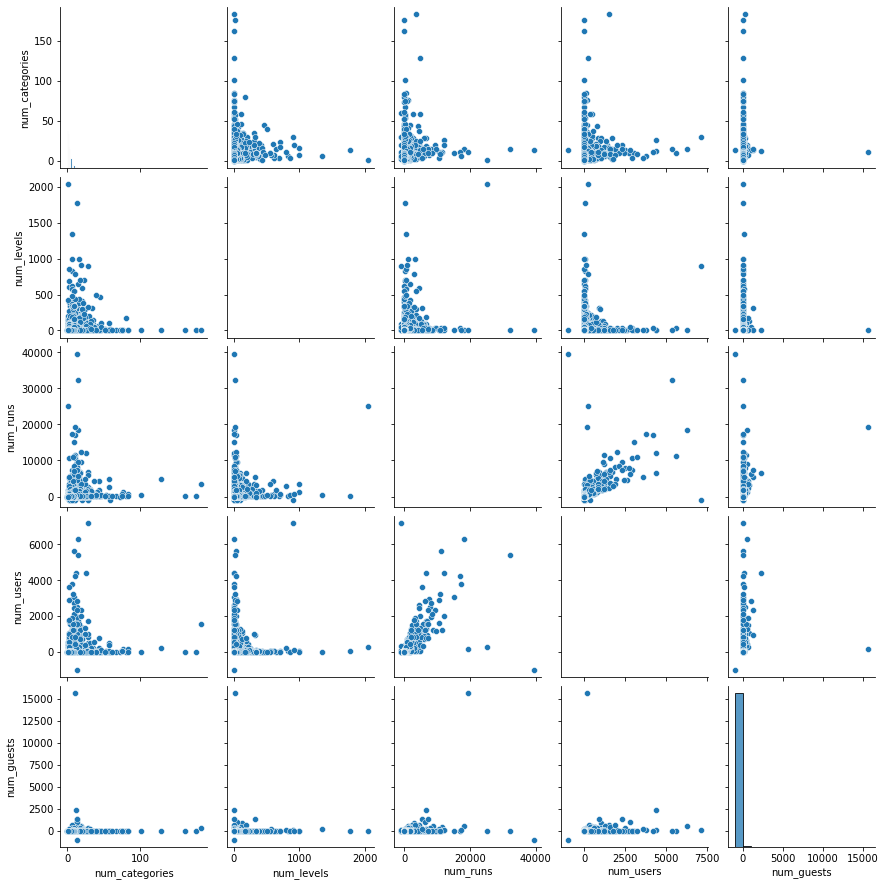

In [37]:
sns.pairplot(df)

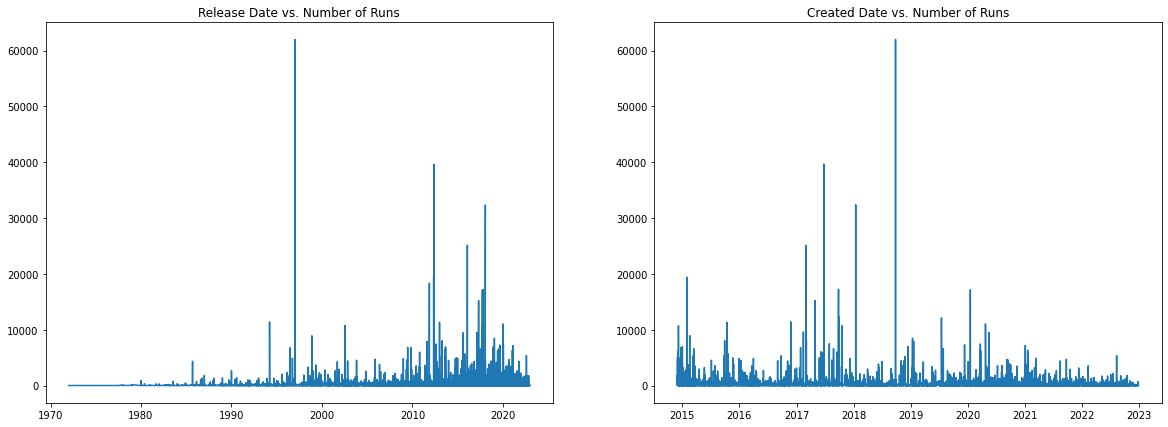

In [5]:
figure, axis = plt.subplots(1, 2)

df = df.sort_values(by='release_date')
axis[0].plot(df['release_date'], df['num_runs'])
axis[0].set_title("Release Date vs. Number of Runs")

df = df.sort_values(by='created_date')
axis[1].plot(df['created_date'], df['num_runs'])
axis[1].set_title("Created Date vs. Number of Runs")

df = df.sort_index()

figure.set_figwidth(20)
figure.set_figheight(7)

plt.show()